In [1]:
import numpy as np
import pandas as pd

# visualization
import altair as alt
from vega_datasets import data

# # set decimals
# pd.set_option('display.float_format', lambda x: '%.2f' % x)

# enable altair visualizations
alt.renderers.enable()
alt.themes.enable('opaque')

ThemeRegistry.enable('opaque')

In [130]:
counties = pd.read_csv('data/Counties_Population.csv')
counties['County'] = counties.Name.str.split(' County').str[0]
counties['CountyState'] = counties.County + ' ' + counties.State

In [131]:
date = 'Mar25'
comp = 'Mar23'

ga_covid = pd.read_csv('cases\Georgia_Counties_Covid_' + date + '.csv', encoding = "ISO-8859-1")
tn_covid = pd.read_csv('cases\Tennessee_Counties_Covid_' + date + '.csv', encoding = "ISO-8859-1")
al_covid = pd.read_csv('cases\Alabama_Counties_Covid_' + date + '.csv', encoding = "ISO-8859-1")

ga_prior = pd.read_csv('cases\Georgia_Counties_Covid_' + comp + '.csv', encoding = "ISO-8859-1")
ga_prior.columns = ['County', 'Prior']
tn_prior = pd.read_csv('cases\Tennessee_Counties_Covid_' + comp + '.csv', encoding = "ISO-8859-1")
tn_prior.columns = ['County', 'Prior']

ga_covid['State'] = 'GA'
tn_covid['State'] = 'TN'
al_covid['State'] = 'AL'

ga_prior['State'] = 'GA'
tn_prior['State'] = 'TN'
# al_covid['State'] = 'AL'

ga_covid['CountyState'] = ga_covid.County + ' ' + ga_covid.State
tn_covid['CountyState'] = tn_covid.County.str.split(' County').str[0] + ' ' + tn_covid.State
al_covid['CountyState'] = al_covid.County + ' ' + al_covid.State


ga_prior['CountyState'] = ga_prior.County + ' ' + ga_prior.State
tn_prior['CountyState'] = tn_prior.County.str.split(' County').str[0] + ' ' + tn_prior.State
# al_prior['CountyState'] = al_prior.County + ' ' + al_prior.State

covid_df = pd.concat([ga_covid, tn_covid, al_covid])
prior_df = pd.concat([ga_prior, tn_prior])

In [133]:
fips = pd.read_csv('FIPS_County_Codes.csv')
fips['CountyState'] = fips.Name.str.strip() + ' ' + fips.State

In [134]:
df = pd.merge(counties, covid_df, on='CountyState', how='outer', suffixes=['', '_y'])
# df.drop(list(df.filter(regex='_y$')), axis=1, inplace=True)
df = pd.merge(df, prior_df, on='CountyState', how='outer', suffixes=['', '_y'])
# df.drop(list(df.filter(regex='_y$')), axis=1, inplace=True)
df =  pd.merge(df, fips, on='CountyState', suffixes=['', '_y'])
df.drop(list(df.filter(regex='_y$')), axis=1, inplace=True)

df['id'] = df.FIPS.astype('str')
df.Cases = df.Cases.fillna(0).astype('int')
df.Prior = df.Prior.fillna(0).astype('int')
df['Incr'] = np.round((df.Cases / df.Prior - 1),4)
df =  df.replace([np.inf, -np.inf], np.nan)
df.Incr = df.Incr.fillna(0.0000)

df['Population'] = df['2020 Population'].str.replace(',', '').fillna(0).astype('int')
df['CasesPer100K'] = np.round(df.Cases / (df['Population'] / 100000),2)
df =  df.replace([np.inf, -np.inf], np.nan)
df.CasesPer100K =  df.CasesPer100K.fillna(0)
df.CasesPer100K = np.round(df.CasesPer100K, 1)

In [135]:
df.head(5)

,Name,State,2020 Population,Growth Since 2010,County,CountyState,Cases,Prior,FIPS,id,Incr,Population,CasesPer100K
0,Anderson County,TN,"76,482",1.83%,Anderson,Anderson TN,3,1,47001,47001,2.0,76482,3.9
1,Appling County,GA,"18,507",0.95%,Appling,Appling GA,0,0,13001,13001,0.0,18507,0.0
2,Atkinson County,GA,"8,297",-0.82%,Atkinson,Atkinson GA,0,0,13003,13003,0.0,8297,0.0
3,Autauga County,AL,"55,601",1.55%,Autauga,Autauga AL,4,0,1001,1001,0.0,55601,7.2
4,Bacon County,GA,"11,185",1.18%,Bacon,Bacon GA,0,0,13005,13005,0.0,11185,0.0


In [136]:
df.sort_values(by=['CasesPer100K'], inplace=True, ascending=False)
df.head(50)

,Name,State,2020 Population,Growth Since 2010,County,CountyState,Cases,Prior,FIPS,id,Incr,Population,CasesPer100K
93,Dougherty County,GA,"91,243",-3.46%,Dougherty,Dougherty GA,123,69,13095,13095,0.7826,91243,134.8
5,Baker County,GA,"3,092",-9.99%,Baker,Baker GA,3,0,13007,13007,0.0000,3092,97.0
177,Lee County,GA,"29,764",4.74%,Lee,Lee GA,25,19,13177,13177,0.3158,29764,84.0
11,Bartow County,GA,"106,408",6.32%,Bartow,Bartow GA,82,61,13015,13015,0.3443,106408,77.1
96,Early County,GA,"10,247",-6.71%,Early,Early GA,6,2,13099,13099,2.0000,10247,58.6
279,Terrell County,GA,"8,611",-9.60%,Terrell,Terrell GA,4,2,13273,13273,1.0000,8611,46.4
37,Carroll County,GA,"118,121",6.74%,Carroll,Carroll GA,50,21,13045,13045,1.3810,118121,42.3
151,Houston County,TN,"8,263",-2.22%,Houston,Houston TN,3,1,47083,47083,2.0000,8263,36.3
208,Miller County,GA,"5,686",-7.26%,Miller,Miller GA,2,1,13201,13201,1.0000,5686,35.2
41,Chambers County,AL,"33,615",-1.49%,Chambers,Chambers AL,10,0,1017,1017,0.0000,33615,29.8


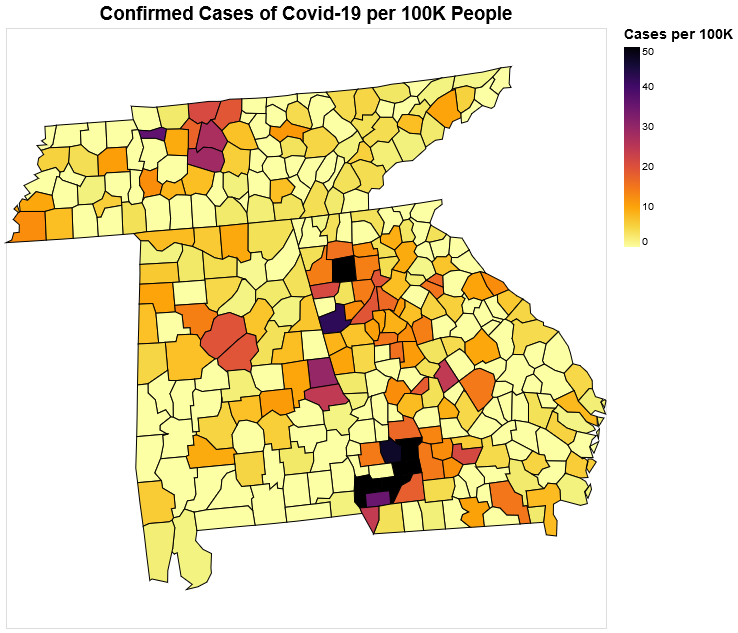

In [137]:
min_value = 0
max_value = 50


counties = alt.topo_feature(data.us_10m.url, 'counties')
states = alt.topo_feature(data.us_10m.url, 'states')
source = df.copy()

width = 600
height = 600
font_size = 30 / (960 / width)

foreground = alt.Chart(counties).mark_geoshape(
    stroke='black'
    ).encode(
    color=alt.Color('CasesPer100K:Q', sort="descending", scale=alt.Scale(
        scheme='inferno', domain=(min_value,max_value)
    ), legend=alt.Legend(title="Cases per 100K", tickCount=6)), 
    tooltip=[
        alt.Tooltip('CountyState:O', title="County"), 
        alt.Tooltip('Cases:Q', title="Cases"), 
        alt.Tooltip('CasesPer100K:Q', title="CasesPer100K"), 
        alt.Tooltip('Population:Q', title="Population"), 
        alt.Tooltip('Incr:Q', title="2 Day Growth Rate", format='.2%')
    ]
).transform_lookup(
    lookup='id',
    from_=alt.LookupData(source, 'id', ['CasesPer100K', 'CountyState', 'Cases', 'Population', 'Incr'])
).project(
    type='albersUsa'
).properties(
    title="Confirmed Cases of Covid-19 per 100K People",
    width=width,
    height=height
).configure_title(fontSize=font_size, anchor="middle").configure_legend(titleColor='black', titleFontSize=14) 

# # generate background for states with no data; create boundary lines for states
# background = alt.Chart(states).mark_geoshape(
#     fill='lightgray',
#     stroke='black'
# ).properties(
#     width=width,
#     height=height
# ).project('albersUsa')

# config = alt.layer(background, foreground).configure_title(fontSize=font_size, anchor="middle").configure_legend(titleColor='black', titleFontSize=14) 

foreground

In [138]:
foreground.save('covid_update.html')

In [41]:
# foreground.save('ga_covid.png')